# Classification Project

## Install and import packages

In [1]:
# Install necessary packages.

#install.packages('glmnet')
#install.packages('caret')
#install.packages('car')
#install.packages('rsample')
#install.packages('MLmetrics')
#install.packages('tidyverse')
#install.packages('ROSE')
#install.packages('smotefamily')
#install.packages('PRROC')
#install.packages("fastDummies")
#install.packages('pROC')
#install.packages('ResourceSelection')
#install.packages('BART')
#install.packages('earth')
#install.packages('Metrics')
#install.packages('bestglm')

In [2]:
# Import packages.

library('glmnet')
library('caret')
library('car')
library('rsample')
library('MLmetrics')
library('tidyverse')
library('ROSE')
library('smotefamily')
library('PRROC')
library("fastDummies")
library('pROC')
library('ResourceSelection')
library('BART')
library('earth')
library('Metrics')
library('MASS')
library('e1071')
library('bestglm')

Loading required package: Matrix

Loaded glmnet 4.1-8

Loading required package: ggplot2

Loading required package: lattice

Loading required package: carData


Attaching package: ‘MLmetrics’


The following objects are masked from ‘package:caret’:

    MAE, RMSE


The following object is masked from ‘package:base’:

    Recall


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
✖ tidyr::pack()   masks Matrix::pack()
✖ dplyr::recode() masks car::recode()
✖ purrr::some()   masks car::some()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http:

## Read and inspect dataset

In [3]:
# Download dataset.

#download.file('https://raw.githubusercontent.com/michp15/statistical_learning_class/refs/heads/main/bank-additional-full.csv', 'bank.csv')

In [4]:
# Read dataset.

df = read.csv('bank.csv', sep=';')

In [5]:
# Inspect dataset for correct formatting.

head(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [6]:
# View types.

str(df)

'data.frame':	41188 obs. of  21 variables:
 $ age           : int  56 57 37 40 56 45 59 41 24 25 ...
 $ job           : chr  "housemaid" "services" "services" "admin." ...
 $ marital       : chr  "married" "married" "married" "married" ...
 $ education     : chr  "basic.4y" "high.school" "high.school" "basic.6y" ...
 $ default       : chr  "no" "unknown" "no" "no" ...
 $ housing       : chr  "no" "no" "yes" "no" ...
 $ loan          : chr  "no" "no" "no" "no" ...
 $ contact       : chr  "telephone" "telephone" "telephone" "telephone" ...
 $ month         : chr  "may" "may" "may" "may" ...
 $ day_of_week   : chr  "mon" "mon" "mon" "mon" ...
 $ duration      : int  261 149 226 151 307 198 139 217 380 50 ...
 $ campaign      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : int  999 999 999 999 999 999 999 999 999 999 ...
 $ previous      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome      : chr  "nonexistent" "nonexistent" "nonexistent" "nonexistent" ...
 $ emp.var.rate  : num  1.1 1.1 1.1 1

In [7]:
# View distributions of categorical data.

for (col in colnames(df)){
  if (!is.numeric(df[, col])){
    print(col)
    print(table(df[, col]))
    cat('\n\n')
  }
}

[1] "job"

       admin.   blue-collar  entrepreneur     housemaid    management 
        10422          9254          1456          1060          2924 
      retired self-employed      services       student    technician 
         1720          1421          3969           875          6743 
   unemployed       unknown 
         1014           330 


[1] "marital"

divorced  married   single  unknown 
    4612    24928    11568       80 


[1] "education"

           basic.4y            basic.6y            basic.9y         high.school 
               4176                2292                6045                9515 
         illiterate professional.course   university.degree             unknown 
                 18                5243               12168                1731 


[1] "default"

     no unknown     yes 
  32588    8597       3 


[1] "housing"

     no unknown     yes 
  18622     990   21576 


[1] "loan"

     no unknown     yes 
  33950     990    6248 


[1] "contact"

## Clean and preprocess dataset

In [8]:
# Remove the 'duration' column. Removing 'duration' prevents data leakage.

duration_vec <- c()
index <- 1
for (col in colnames(df)){
  if (col == 'duration'){
    duration_vec[index] <- TRUE
  } else {
    duration_vec[index] <- FALSE
  }
  index <- index + 1
}
df <- df[, !duration_vec]
rm(duration_vec)
rm(index)

In [9]:
# Function that checks for and removes duplicates.

check_remove_duplicates <- function(df) {
  duplicates <- duplicated(df)

  if (any(duplicates)){
    cat('There are:', sum(duplicates), 'duplicates.')
    df <- df[!duplicates,]
    cat('\n\nDuplicates removed.')
  }

  return (df)
}

In [10]:
# Remove duplicates.

df <- check_remove_duplicates(df)

There are: 1784 duplicates.

Duplicates removed.

In [11]:
# Check for null values.

cat(any(is.na(df)))

FALSE

In [12]:
# Check dependent variable distribution.

table(df$y)


   no   yes 
34806  4598 

In [13]:
# Check the proportion of the value 'unknown' per column

for (i in 1:ncol(df)){
  if (is.character(df[, i])){
    print(i)
    print((sum(df[, i] == 'unknown') / nrow(df)))
  }
}

[1] 2
[1] 0.008247894
[1] 3
[1] 0.002004873
[1] 4
[1] 0.04278753
[1] 5
[1] 0.2097757
[1] 6
[1] 0.02487057
[1] 7
[1] 0.02487057
[1] 8
[1] 0
[1] 9
[1] 0
[1] 10
[1] 0
[1] 14
[1] 0
[1] 20
[1] 0


In [14]:
colnames(df)[5]

[1] "default"

In [15]:
df <- subset(df, select = -default)

In [16]:
df <- df[!apply(df, 1, function(row) any(row == 'unknown')), ]

In [17]:
dim(df)

[1] 36518    19

In [18]:
# The number of rows that have 'pdays' equal to 999.

sum(df$pdays == 999)

[1] 35153

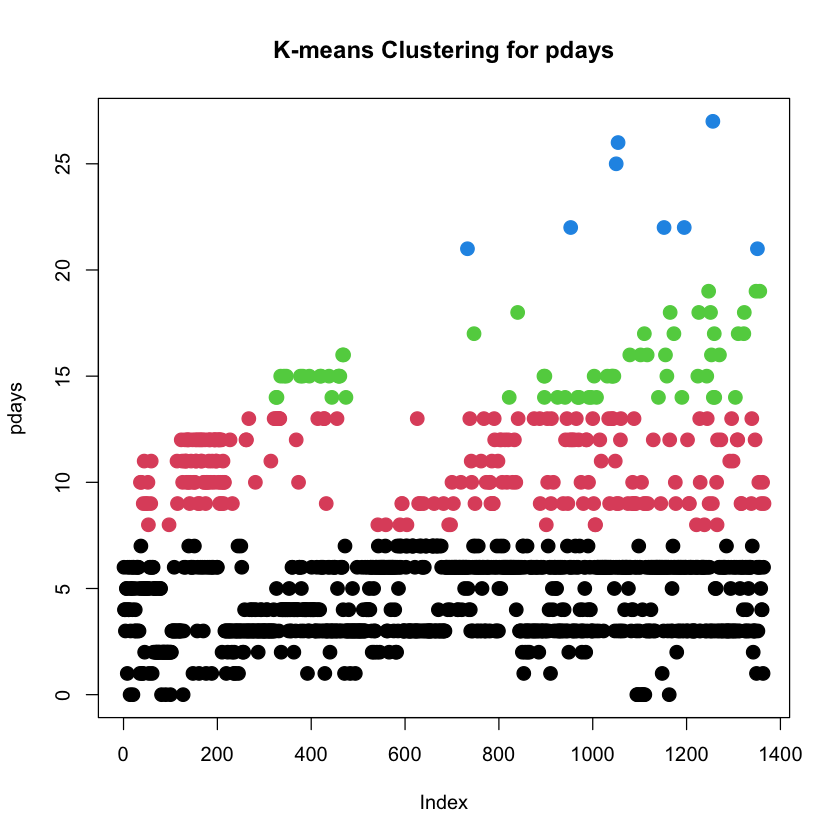

In [19]:
# Cluster 'pdays' in meaningful categories to resolve the '999' problem

set.seed(123)
kmeans_result <- kmeans(df[df$pdays != 999, 'pdays'], centers = 4, algorithm='Hartigan-Wong')
plot(df[df$pdays != 999, 'pdays'],
     col = kmeans_result$cluster,
     pch = 19,
     main = "K-means Clustering for pdays",
     xlab = "Index",
     ylab = "pdays",
     col.axis = "black",
     cex = 1.5)

In [20]:
# Check cluster separation.

kmeans_result$betweenss / kmeans_result$totss # -> well separated clusters

[1] 0.8102364

In [21]:
# The cluster centroids.

kmeans_result$centers

1,4.30000
2,10.65778
3,15.46774
4,23.25000


In [22]:
# Function to get the index of the minimum value in a vector.

argmin <- function(vec){
  min <- vec[1]
  min_index <- 1
  for (i in 1:length(vec)){
    if (vec[i] < min){
      min <- vec[i]
      min_index <- i
    }
  }
  return (min_index)
}

# Function to compute the Euclidean distance between two 1D points.

euc_distance <- function(x, y){
  return (abs(y - x))  # sqrt((y - x)^2) simplifies to abs(y - x)
}

# Function to find the index of the closest value in a 1D vector.

argmin_distances <- function(x, vec){
  distances <- sapply(vec, function(v) euc_distance(x, v))
  return (argmin(distances))
}

# Encoding 'pdays' based on proximity to k-means cluster centers.

pdays_new_values <- character(nrow(df))

for (i in 1:nrow(df)){
  if (df[i, 'pdays'] == 999){
    pdays_new_values[i] <- 'never'
  } else {
    temp <- argmin_distances(df[i, 'pdays'], kmeans_result$centers)
    temp <- switch(temp,
                   '1' = 'very recent',
                   '2' = 'recent',
                   '3' = 'moderate',
                   '4' = 'older')
    pdays_new_values[i] <- temp
  }
}

df$pdays <- pdays_new_values

rm(pdays_new_values)

In [23]:
# Remove duplicates.

df <- check_remove_duplicates(df)

There are: 215 duplicates.

Duplicates removed.

In [24]:
# Find unique values for each categorical column.

for (colname in colnames(df)){
  if (!is.numeric(df[[colname]])){
    cat(colname,'\n')
    cat(unique(df[[colname]]))
    cat('\n\n')
  }
}

job 
housemaid services admin. technician blue-collar retired management unemployed self-employed entrepreneur student

marital 
married single divorced

education 
basic.4y high.school basic.6y basic.9y professional.course university.degree illiterate

housing 
no yes

loan 
no yes

contact 
telephone cellular

month 
may jun jul aug oct nov dec mar apr sep

day_of_week 
mon tue wed thu fri

pdays 
never very recent recent moderate older

poutcome 
nonexistent failure success

y 
no yes



In [25]:
# Encode dependent variable 'y'.

df$y <- as.integer(ifelse(df$y == 'yes', 1, 0))

In [26]:
# Encode 'month' and 'day_of_week' columns.

for (i in 1:nrow(df)){
  df[i, 'month'] <- switch(df[i, 'month'],
                           'mar' = 0,
                           'apr' = 1,
                           'may' = 2,
                           'jun' = 3,
                           'jul' = 4,
                           'aug' = 5,
                           'sep' = 6,
                           'oct' = 7,
                           'nov' = 8,
                           'dec' = 9)

  df[i, 'day_of_week'] <- switch(df[i, 'day_of_week'],
                                 'mon' = 0,
                                 'tue' = 1,
                                 'wed' = 2,
                                 'thu' = 3,
                                 'fri' = 4)
}

df$month <- as.numeric(df$month)
df$day_of_week <- as.numeric(df$day_of_week)

df$sin_month <- sin(2 * pi * df$month / 10)
df$cos_month <- cos(2 * pi * df$month / 10)
df$sin_day_of_week <- sin(2 * pi * df$day_of_week / 5)
df$cos_day_of_week <- cos(2 * pi * df$day_of_week / 5)

df <- subset(df, select = -c(month, day_of_week))

In [27]:
# Encode the 'contact' column.

names(df)[names(df) == 'contact'] <- 'mobile_phone'
df$mobile_phone <- as.integer(ifelse(df$mobile_phone == 'cellular', 1, 0))

In [28]:
# Encode 'housing' and 'loan'

df$housing <- as.integer(ifelse(df$housing == 'yes', 1, 0))
df$loan <- as.integer(ifelse(df$loan == 'yes', 1, 0))

In [29]:
# Education to ordered factor

df$education <- factor(df$education,
                       levels = c('illiterate', 'basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'university.degree'),
                       ordered = TRUE)

In [30]:
# Pdays to ordered factor

df$pdays <- factor(df$pdays,
                   levels = c('never', 'very recent', 'recent', 'moderate', 'older'),
                   ordered = TRUE)

In [31]:
# Remove duplicates.

df <- check_remove_duplicates(df)

In [32]:
# Convert all character columns to factors.

df[] <- lapply(df, function(x) if(is.character(x)) as.factor(x) else x)

In [33]:
# Get dummy variables

df <- dummy_cols(df, remove_first_dummy = TRUE, remove_selected_columns=TRUE)

In [34]:
#write.csv(df, 'bank_latest_latest.csv', row.names=FALSE)

In [35]:
# Split train val test

split_1 <- initial_split(df, prop = 0.8, strata = 'y')
train <- training(split_1)
temp <- testing(split_1)

split_2 <- initial_split(temp, prop = 0.5, strata = 'y')
val <- training(split_2)
test <- testing(split_2)

## Modeling

### Logistic Regression

In [36]:
# Calculate y variable class proportions for model weights

class_proportions <- prop.table(table(train$y))
weights <- ifelse(train$y == 1, 1 / class_proportions['1'], 1 / class_proportions['0'])

In [37]:
# Fit Logistic Regression model

model <- glm(y ~ ., data=train, family=binomial(link='logit'), weights=weights, maxit=10000)
summary(model)

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Call:
glm(formula = y ~ ., family = binomial(link = "logit"), data = train, 
    weights = weights, maxit = 10000)

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -1.122e+02  9.164e+00 -12.240  < 2e-16 ***
age                           -8.524e-04  1.167e-03  -0.730 0.465175    
housing                       -7.958e-02  1.944e-02  -4.092 4.27e-05 ***
loan                          -7.648e-02  2.656e-02  -2.880 0.003978 ** 
mobile_phone                   7.413e-01  3.445e-02  21.518  < 2e-16 ***
campaign                      -4.695e-02  4.498e-03 -10.439  < 2e-16 ***
previous                      -1.096e-01  4.754e-02  -2.305 0.021190 *  
emp.var.rate                  -7.823e-01  3.653e-02 -21.415  < 2e-16 ***
cons.price.idx                 1.233e+00  5.604e-02  21.994  < 2e-16 ***
cons.conf.idx                  2.529e-02  3.827e-03   6.608 3.90e-11 ***
euribor3m                      2.431e-02  5.452e-02   0.446 0.6556

In [38]:
print(exp(coef(model)))

                  (Intercept)                           age 
                 1.920250e-49                  9.991480e-01 
                      housing                          loan 
                 9.235081e-01                  9.263694e-01 
                 mobile_phone                      campaign 
                 2.098699e+00                  9.541323e-01 
                     previous                  emp.var.rate 
                 8.962184e-01                  4.573594e-01 
               cons.price.idx                 cons.conf.idx 
                 3.430288e+00                  1.025612e+00 
                    euribor3m                   nr.employed 
                 1.024611e+00                  9.995407e-01 
                    sin_month                     cos_month 
                 8.488425e-01                  8.290253e-01 
              sin_day_of_week               cos_day_of_week 
                 1.017053e+00                  9.214126e-01 
            `job_blue-co

In [39]:
probabilities <- predict(model, newdata=val, type='response')

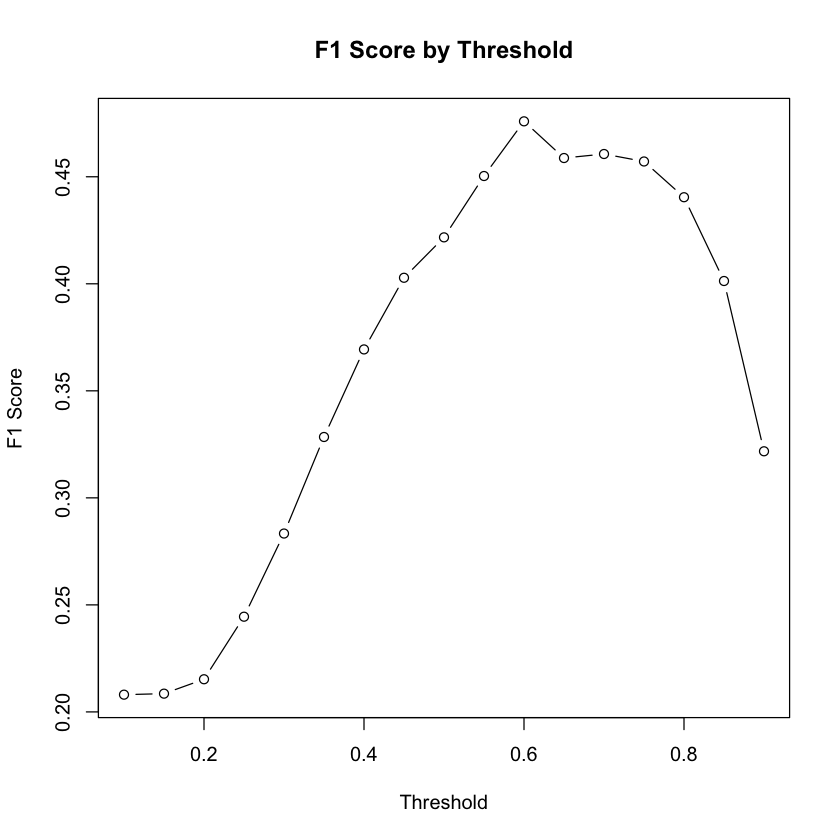

In [40]:
# Tune logistic regression p for F1 Score

thresholds <- seq(0.1, 0.9, by = 0.05)
f1_scores <- sapply(thresholds, function(t) {
  preds <- ifelse(probabilities >= t, 1, 0)
  f1 <- F1_Score(val$y, preds, positive = '1')
  return(f1)
})

plot(thresholds, f1_scores, type = 'b', main = 'F1 Score by Threshold', ylab = 'F1 Score', xlab = 'Threshold')
best_thresh <- thresholds[which.max(f1_scores)]

In [41]:
probabilities_train <- predict(model, newdata=train, type='response')
predicted_classes_train <- ifelse(probabilities_train >= 0.60, 1, 0)

In [42]:
probabilities <- predict(model, newdata=test, type='response')
predicted_classes <- ifelse(probabilities >= 0.60, 1, 0)

In [43]:
F1_Score(train$y, predicted_classes_train, positive = '1')

[1] 0.4663387

In [44]:
F1_Score(test$y, predicted_classes, positive = '1')

[1] 0.4540764

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test$y, predictor = probabilities)

Data: probabilities in 3209 controls (test$y 0) < 422 cases (test$y 1).
Area under the curve: 0.7701

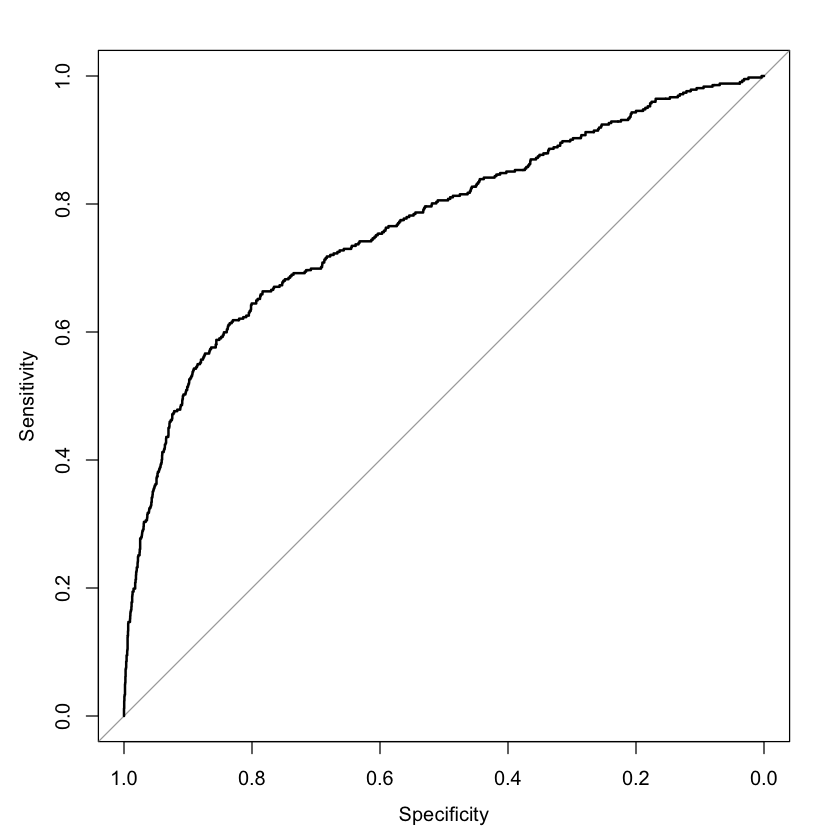

In [45]:
roc_curve <- roc(test$y, probabilities)
plot(roc_curve)
roc_curve

In [46]:
logLik(model) # higher the better

'log Lik.' -30902.71 (df=40)

In [47]:
deviance(model)

[1] 63933.95

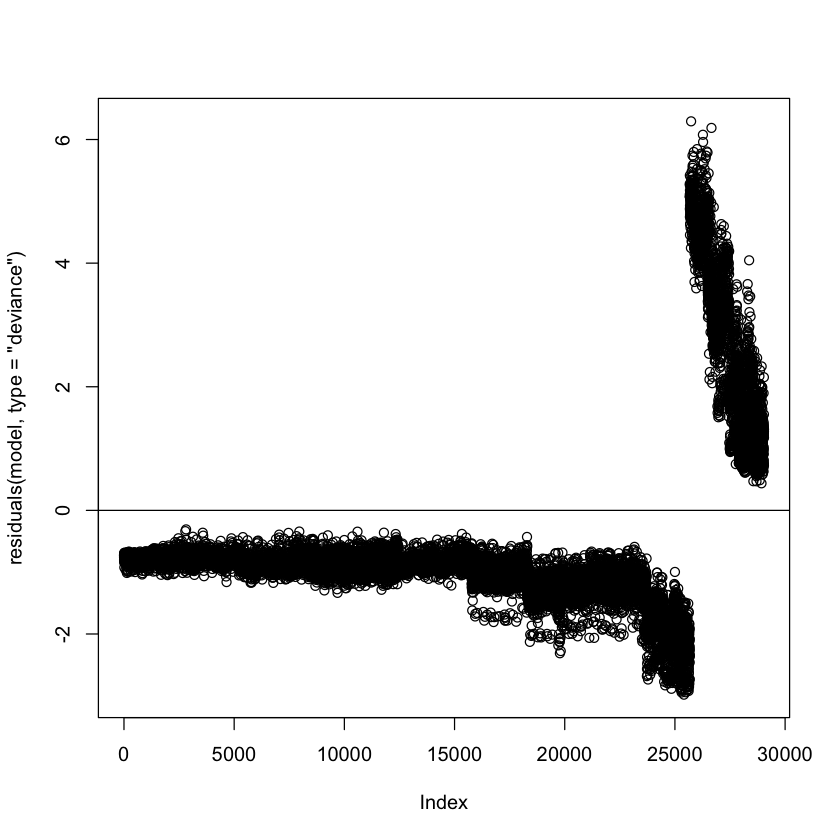

In [48]:
plot(residuals(model, type = "deviance"))
abline(h=0)

In [49]:
print(vif(model))

                          age                       housing 
                     1.773931                      1.015903 
                         loan                  mobile_phone 
                     1.006284                      2.605386 
                     campaign                      previous 
                     1.047221                      6.425411 
                 emp.var.rate                cons.price.idx 
                    39.693180                     12.280859 
                cons.conf.idx                     euribor3m 
                     4.059576                    107.456670 
                  nr.employed                     sin_month 
                    53.566029                      2.310255 
                    cos_month               sin_day_of_week 
                     2.167689                      1.013990 
              cos_day_of_week             `job_blue-collar` 
                     1.008220                      2.290069 
             job_entrepr

In [50]:
hoslem.test(train$y, fitted(model))


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  train$y, fitted(model)
X-squared = 13367, df = 8, p-value < 2.2e-16


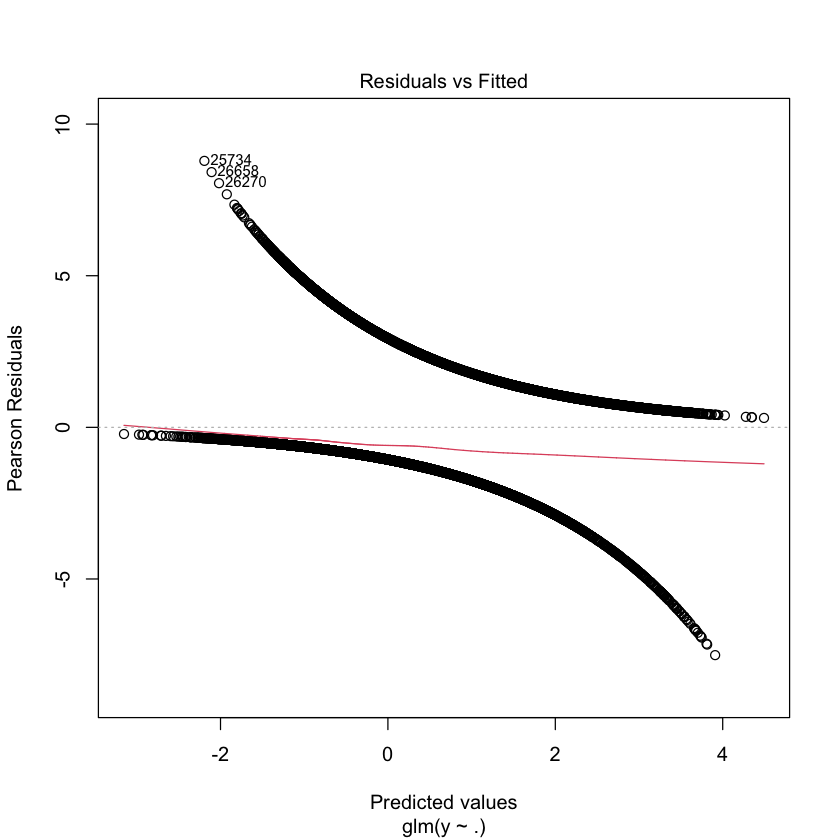

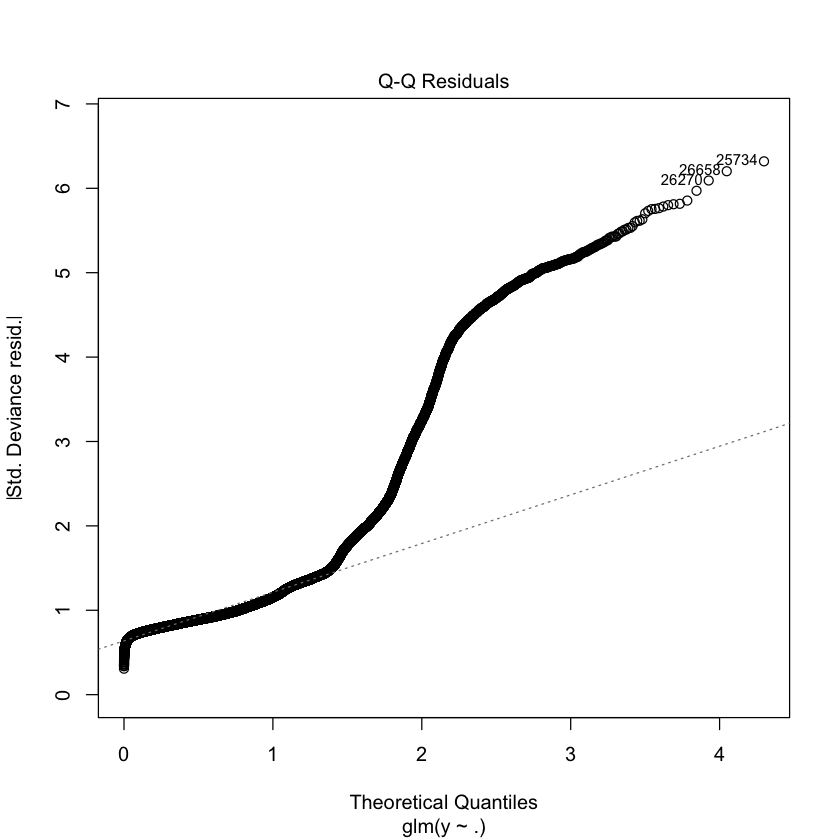

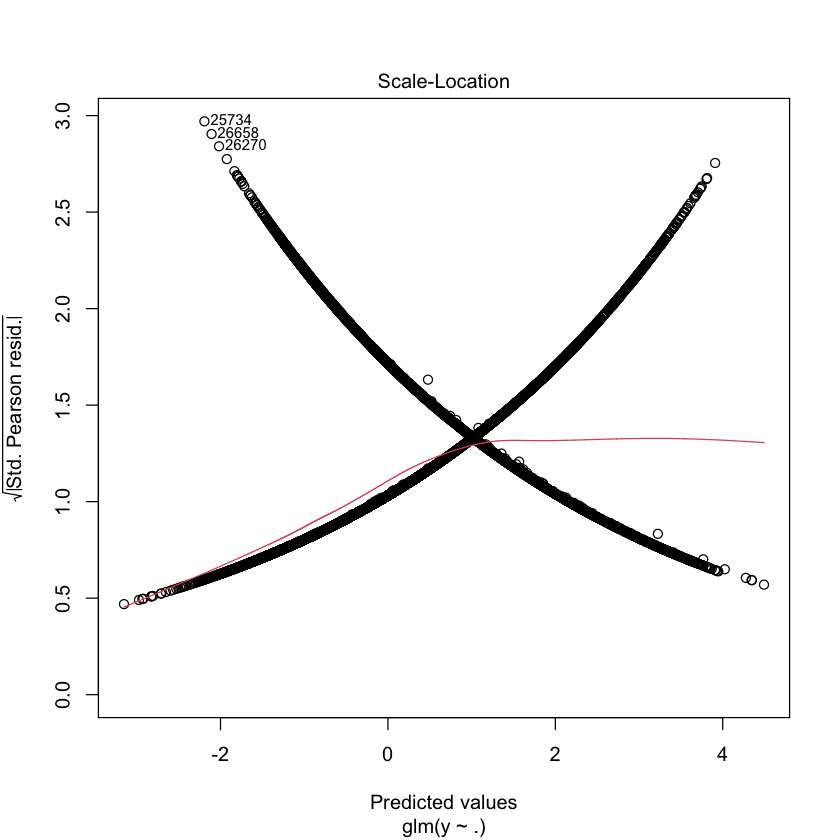

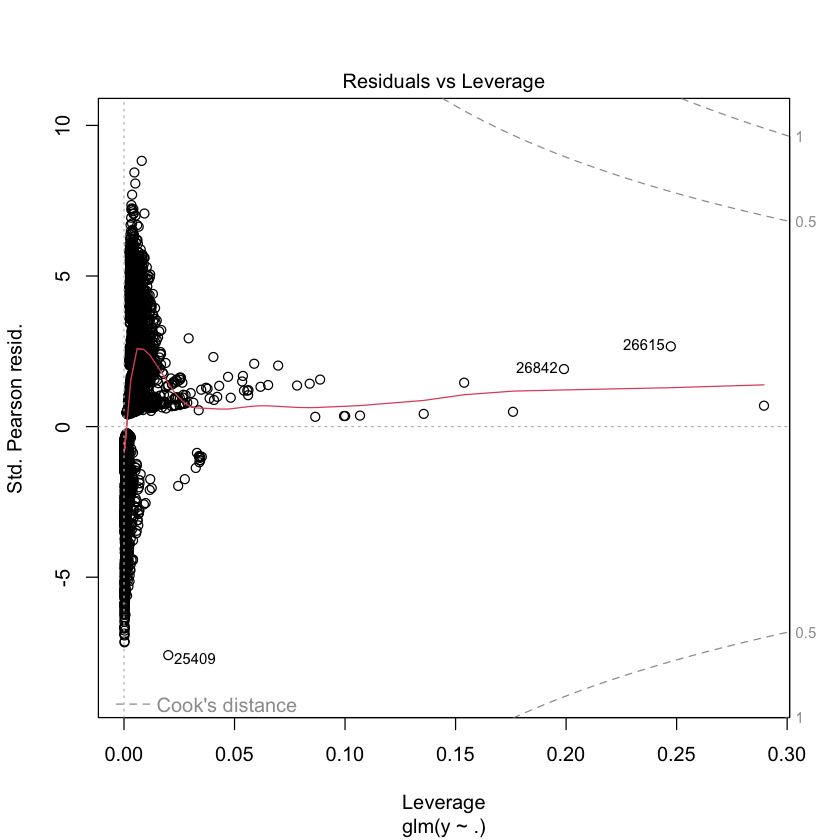

In [51]:
plot(model)

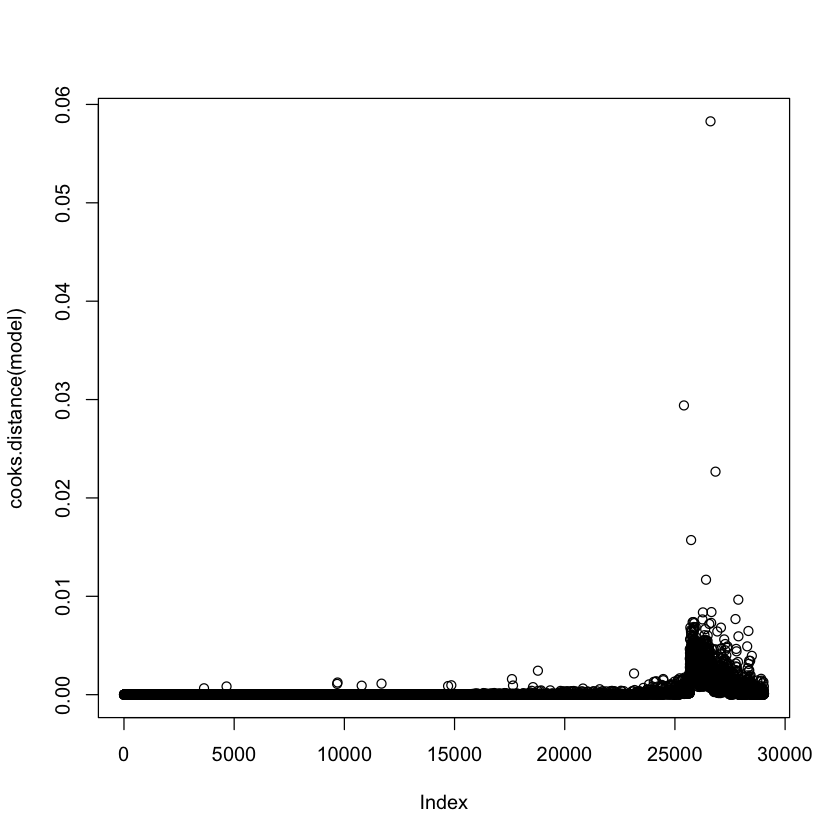

In [52]:
plot(cooks.distance(model))

In [53]:
4 / 29042

[1] 0.0001377316

In [54]:
# cooksd <- cooks.distance(model)
# influential <- which(cooksd > 4 / 29042)  # you could also use 4/n as a stricter cutoff
# train <- train[influential, ]

In [55]:
dim(train)

[1] 29042    40

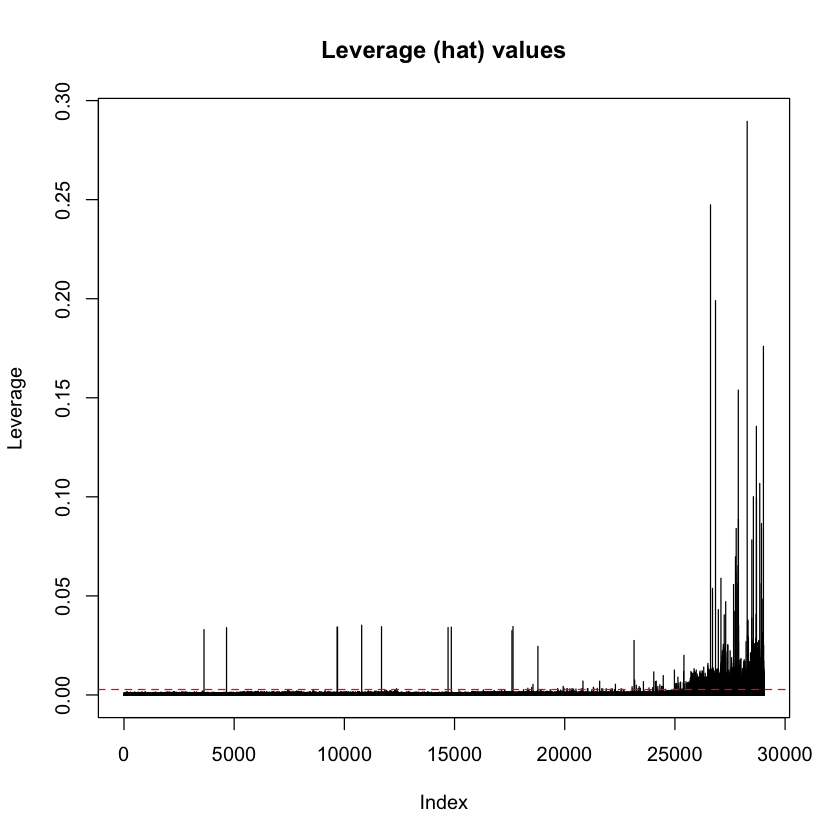

In [56]:
leverage_values <- hatvalues(model)
plot(leverage_values, type = 'h', main = 'Leverage (hat) values', ylab = 'Leverage')
abline(h = 2 * mean(leverage_values), col = 'red', lty = 2)

In [57]:
# # Calculate leverage
# leverage_values <- hatvalues(model)

# # Define a threshold for high leverage
# threshold <- 2 * mean(leverage_values)  # You could also try 3 * mean(...) or use (2*p)/n

# # Identify high leverage points
# high_leverage_indices <- which(leverage_values > threshold)

# # View the rows
# train[high_leverage_indices, ]  # Optional: inspect the observations

# # Create a cleaned dataset (excluding high leverage points)
# train <- train[-high_leverage_indices, ]

### L1 logistic regression

In [87]:
model_lasso <- cv.glmnet(as.matrix(subset(train, select=-c(y))), 
                         train$y, 
                         family = "binomial", 
                         alpha = 1,
                         nfolds = 10, 
                         maxit=10000, 
                         weights=weights,
                         type.measure = "auc")

In [88]:
coef(model_lasso)

40 x 1 sparse Matrix of class "dgCMatrix"
                                        s1
(Intercept)                   18.107374814
age                            .          
housing                       -0.017756365
loan                           .          
mobile_phone                   0.344013659
campaign                      -0.035267127
previous                       .          
emp.var.rate                  -0.177893518
cons.price.idx                 0.220890158
cons.conf.idx                  .          
euribor3m                      .          
nr.employed                   -0.007655867
sin_month                     -0.116719128
cos_month                     -0.210391219
sin_day_of_week                .          
cos_day_of_week               -0.030987797
job_blue-collar               -0.056601208
job_entrepreneur               .          
job_housemaid                  .          
job_management                 .          
job_retired                    0.220776924
job_self-emp

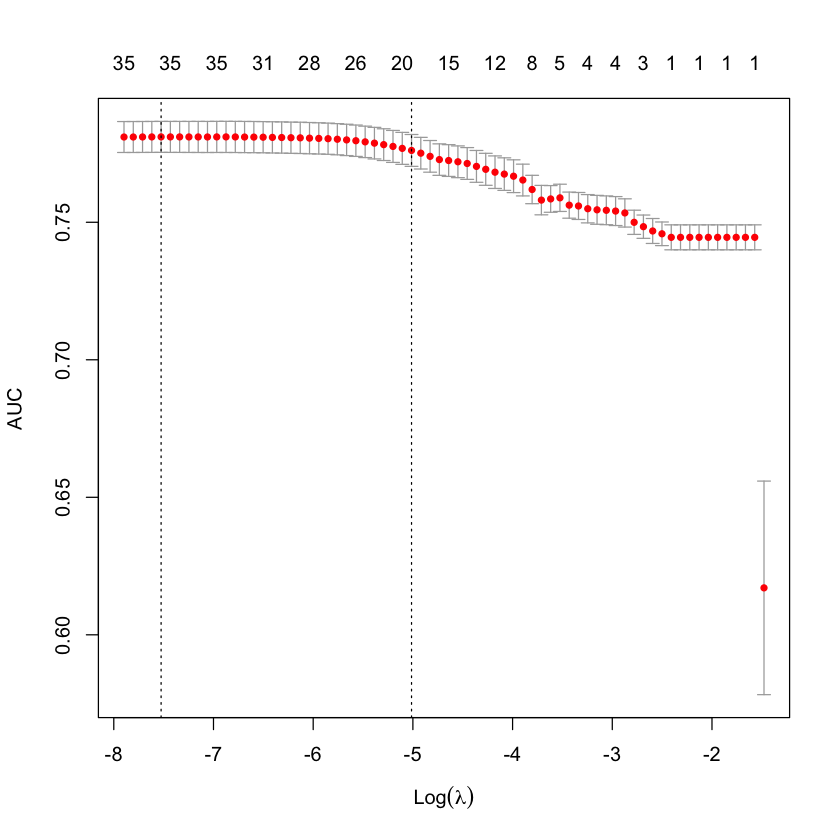

In [90]:
plot(model_lasso)

In [91]:
lambda_min <- model_lasso$lambda.min
lambda_1se <- model_lasso$lambda.1se

In [92]:
print(lambda_min)
print(lambda_1se)

[1] 0.0005391907
[1] 0.006647395


In [93]:
pred_min_train <- predict(model_lasso, s = lambda_min, newx = model.matrix(~ . - y, data = train)[, -1], type = 'response')
pred_1se_train <- predict(model_lasso, s = lambda_1se, newx = model.matrix(~ . - y, data = train)[, -1], type = 'response')

In [94]:
pred_min_val <- predict(model_lasso, s = lambda_min, newx = model.matrix(~ . - y, data = val)[, -1], type = 'response')
pred_1se_val <- predict(model_lasso, s = lambda_1se, newx = model.matrix(~ . - y, data = val)[, -1], type = 'response')

In [95]:
pred_min_test <- predict(model_lasso, s = lambda_min, newx = model.matrix(~ . - y, data = test)[, -1], type = 'response')
pred_1se_test <- predict(model_lasso, s = lambda_1se, newx = model.matrix(~ . - y, data = test)[, -1], type = 'response')

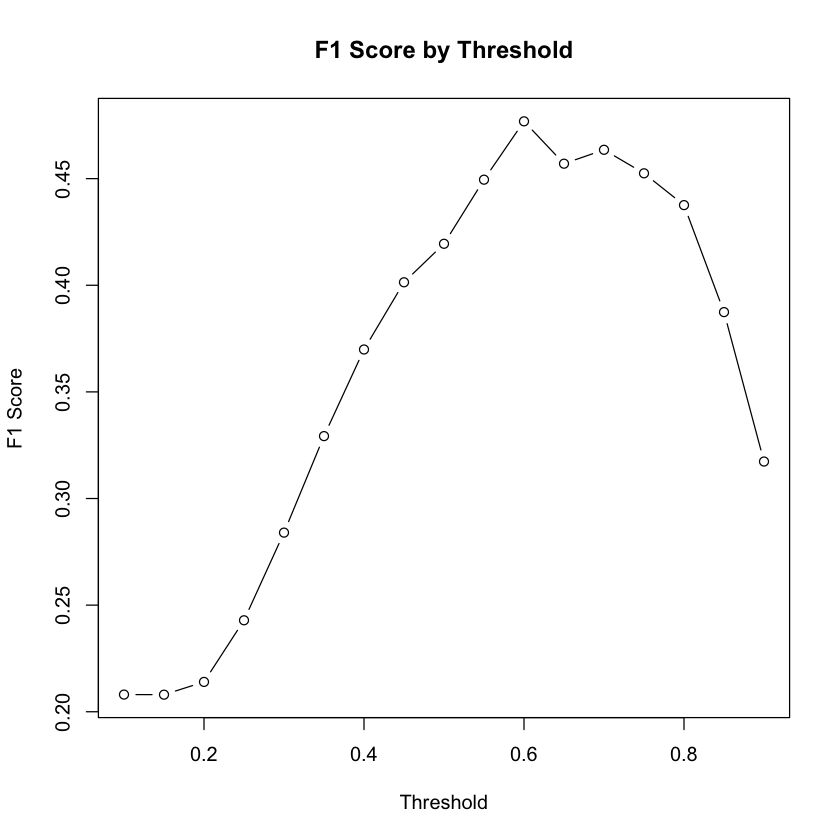

In [96]:
# Tune lambda min l1 logistic regression p for F1 Score

thresholds <- seq(0.1, 0.9, by = 0.05)
f1_scores <- sapply(thresholds, function(t) {
  preds <- ifelse(pred_min_val >= t, 1, 0)
  f1 <- F1_Score(val$y, preds, positive = '1')
  return(f1)
})

plot(thresholds, f1_scores, type = 'b', main = 'F1 Score by Threshold', ylab = 'F1 Score', xlab = 'Threshold')
best_thresh <- thresholds[which.max(f1_scores)]

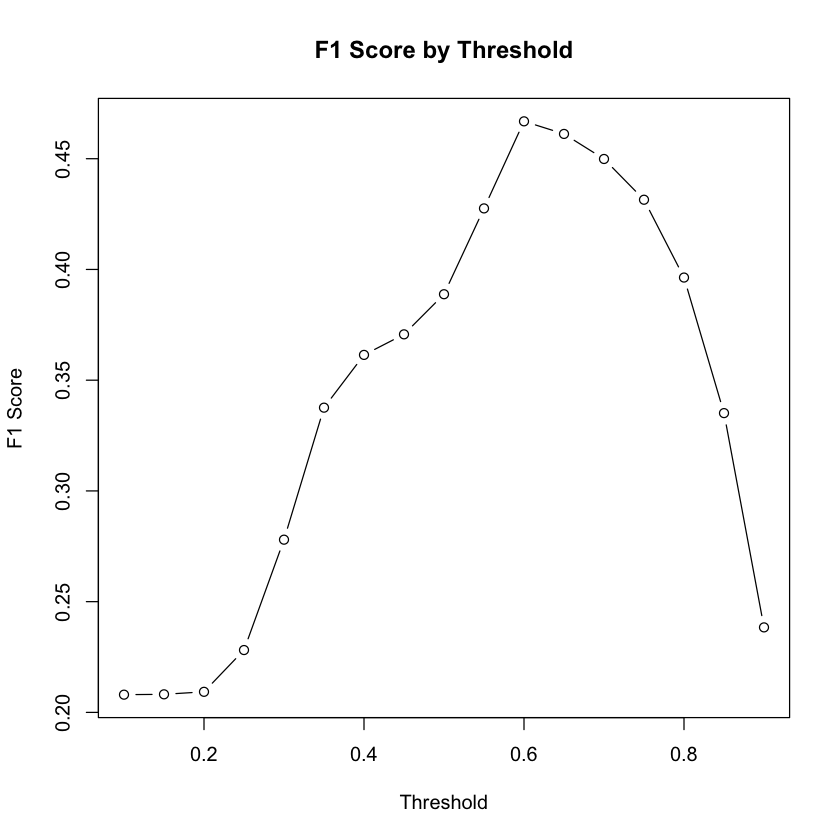

In [97]:
# Tune 1 se l1 logistic regression p for F1 Score

thresholds <- seq(0.1, 0.9, by = 0.05)
f1_scores <- sapply(thresholds, function(t) {
  preds <- ifelse(pred_1se_val >= t, 1, 0)
  f1 <- F1_Score(val$y, preds, positive = '1')
  return(f1)
})

plot(thresholds, f1_scores, type = 'b', main = 'F1 Score by Threshold', ylab = 'F1 Score', xlab = 'Threshold')
best_thresh <- thresholds[which.max(f1_scores)]

In [98]:
predicted_classes_lambda_min_train <- ifelse(pred_min_train >= 0.65, 1, 0)
predicted_classes_lambda_1se_train <- ifelse(pred_1se_train >= 0.65, 1, 0)
F1_Score(train$y, predicted_classes_lambda_min_train, positive = '1')
F1_Score(train$y, predicted_classes_lambda_1se_train, positive = '1')

[1] 0.4634596

[1] 0.4597006

In [99]:
predicted_classes_lambda_min_test <- ifelse(pred_min_test >= 0.65, 1, 0)
predicted_classes_lambda_1se_test <- ifelse(pred_1se_test >= 0.65, 1, 0)
F1_Score(test$y, predicted_classes_lambda_min_test, positive = '1')
F1_Score(test$y, predicted_classes_lambda_1se_test, positive = '1')

[1] 0.4561404

[1] 0.4547619

Setting levels: control = 0, case = 1

Warning message in roc.default(test$y, pred_min_test):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases




Call:
roc.default(response = test$y, predictor = pred_min_test)

Data: pred_min_test in 3209 controls (test$y 0) < 422 cases (test$y 1).
Area under the curve: 0.7714

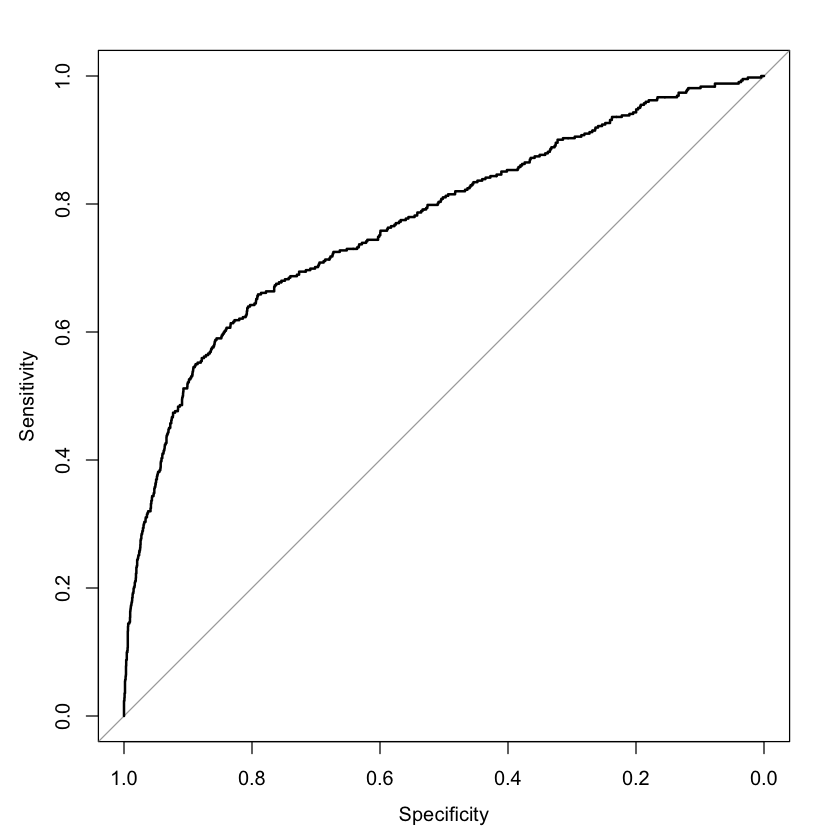

In [100]:
roc_curve <- roc(test$y, pred_min_test)
plot(roc_curve)
roc_curve

## LDA

[1] 0.3892216

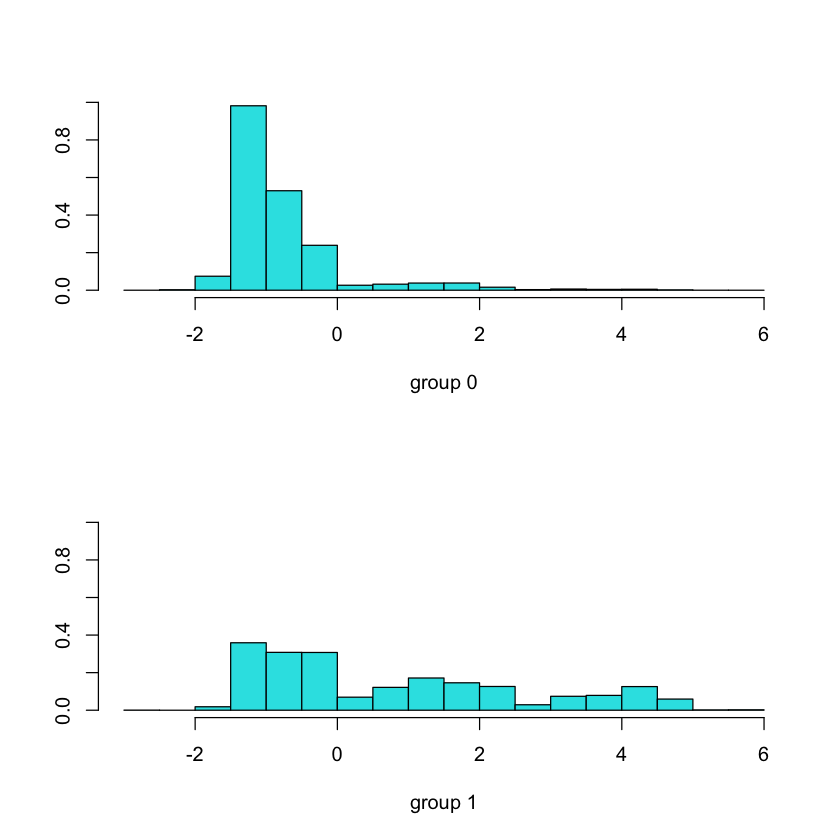

In [71]:
lda_model <- lda(y ~ ., data = train)
plot(lda_model)
lda_predictions_test <- predict(lda_model, newdata = test)
predicted_classes_test <- lda_predictions_test$class
F1_Score(predicted_classes_test, test$y, positive='1')

In [72]:
lda_model

Call:
lda(y ~ ., data = train)

Prior probabilities of groups:
        0         1 
0.8839612 0.1160388 

Group means:
       age   housing      loan mobile_phone campaign  previous emp.var.rate
0 39.84127 0.5362652 0.1628233    0.6059131 2.706801 0.1372702    0.2179729
1 40.68398 0.5468843 0.1516320    0.8252226 2.074481 0.4833828   -1.2150148
  cons.price.idx cons.conf.idx euribor3m nr.employed sin_month  cos_month
0       93.59627     -40.65092  3.777902    5174.995 0.4833488 -0.1394328
1       93.36347     -39.89852  2.141458    5095.899 0.2596455 -0.1026482
  sin_day_of_week cos_day_of_week `job_blue-collar` job_entrepreneur
0   -0.0046041538     0.006075499         0.2317700       0.03653786
1    0.0004806586    -0.035834534         0.1430267       0.02433234
  job_housemaid job_management job_retired `job_self-employed` job_services
0    0.02641010     0.07307572  0.03560299          0.03708320   0.10151137
1    0.02433234     0.07418398  0.08872404          0.03086053   0.07388

## QDA

In [73]:
qda_model <- qda(y ~ ., data = train)
summary(qda_model)
qda_predictions_test <- predict(qda_model, newdata = test)
predicted_classes_test <- qda_predictions_test$class
F1_Score(predicted_classes_test, test$y, positive='1')

        Length Class  Mode     
prior      2   -none- numeric  
counts     2   -none- numeric  
means     78   -none- numeric  
scaling 3042   -none- numeric  
ldet       2   -none- numeric  
lev        2   -none- character
N          1   -none- numeric  
call       3   -none- call     
terms      3   terms  call     
xlevels    0   -none- list     

[1] 0.3984868

In [74]:
qda_model

Call:
qda(y ~ ., data = train)

Prior probabilities of groups:
        0         1 
0.8839612 0.1160388 

Group means:
       age   housing      loan mobile_phone campaign  previous emp.var.rate
0 39.84127 0.5362652 0.1628233    0.6059131 2.706801 0.1372702    0.2179729
1 40.68398 0.5468843 0.1516320    0.8252226 2.074481 0.4833828   -1.2150148
  cons.price.idx cons.conf.idx euribor3m nr.employed sin_month  cos_month
0       93.59627     -40.65092  3.777902    5174.995 0.4833488 -0.1394328
1       93.36347     -39.89852  2.141458    5095.899 0.2596455 -0.1026482
  sin_day_of_week cos_day_of_week `job_blue-collar` job_entrepreneur
0   -0.0046041538     0.006075499         0.2317700       0.03653786
1    0.0004806586    -0.035834534         0.1430267       0.02433234
  job_housemaid job_management job_retired `job_self-employed` job_services
0    0.02641010     0.07307572  0.03560299          0.03708320   0.10151137
1    0.02433234     0.07418398  0.08872404          0.03086053   0.07388

## Naive bayes

In [75]:
nb_model <- naiveBayes(y ~ ., data = train)
nb_preds <- predict(nb_model, newdata = test)
F1_Score(nb_preds, test$y, positive = '1')

[1] 0.3564626

In [76]:
nb_model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.8839612 0.1160388 

Conditional probabilities:
   age
Y       [,1]      [,2]
  0 39.84127  9.839604
  1 40.68398 13.425370

   housing
Y        [,1]      [,2]
  0 0.5362652 0.4986928
  1 0.5468843 0.4978709

   loan
Y        [,1]      [,2]
  0 0.1628233 0.3692116
  1 0.1516320 0.3587171

   mobile_phone
Y        [,1]      [,2]
  0 0.6059131 0.4886632
  1 0.8252226 0.3798330

   campaign
Y       [,1]     [,2]
  0 2.706801 2.941088
  1 2.074481 1.656840

   previous
Y        [,1]      [,2]
  0 0.1372702 0.4137343
  1 0.4833828 0.8509540

   emp.var.rate
Y         [,1]     [,2]
  0  0.2179729 1.490409
  1 -1.2150148 1.624733

   cons.price.idx
Y       [,1]      [,2]
  0 93.59627 0.5641307
  1 93.36347 0.6828682

   cons.conf.idx
Y        [,1]     [,2]
  0 -40.65092 4.413710
  1 -39.89852 6.153377

   euribor3m
Y       [,1]     [,2]
  

## Feature Selection

### Stepwise selection

#### Backward

In [77]:
# Step 1: Fit logistic regression with stepwise selection on training data
full_model <- glm(y ~ ., data = train, family = binomial(), weights = weights)
step_model <- step(full_model, direction = 'backward')

# Step 2: Predict probabilities on validation set
val_probs <- predict(step_model, newdata = val, type = 'response')

# Step 3: Tune classification threshold p using F1 score
thresholds <- seq(0.1, 0.9, by = 0.01)
f1_scores <- sapply(thresholds, function(t) {
  preds <- ifelse(val_probs > t, 1, 0)
  true <- val$y
  precision <- sum(preds == 1 & true == 1) / sum(preds == 1)
  recall <- sum(preds == 1 & true == 1) / sum(true == 1)
  if (is.na(precision) | is.na(recall) | (precision + recall) == 0) return(0)
  return(2 * precision * recall / (precision + recall))
})

best_p <- thresholds[which.max(f1_scores)]
cat('Best threshold p:', best_p, '\n')

# Step 4: Predict on test set using best threshold
test_probs <- predict(step_model, newdata = test, type = 'response')
test_preds <- ifelse(test_probs > best_p, 1, 0)

# Step 5: Evaluate predictions
confusion_matrix <- table(Predicted = test_preds, Actual = test$y)
print(confusion_matrix)

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


Start:  AIC=61885.43
y ~ age + housing + loan + mobile_phone + campaign + previous + 
    emp.var.rate + cons.price.idx + cons.conf.idx + euribor3m + 
    nr.employed + sin_month + cos_month + sin_day_of_week + cos_day_of_week + 
    `job_blue-collar` + job_entrepreneur + job_housemaid + job_management + 
    job_retired + `job_self-employed` + job_services + job_student + 
    job_technician + job_unemployed + marital_married + marital_single + 
    education_basic.4y + education_high.school + education_basic.6y + 
    education_basic.9y + education_professional.course + education_university.degree + 
    `pdays_very recent` + pdays_recent + pdays_moderate + pdays_older + 
    poutcome_nonexistent + poutcome_success



Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$i

                                Df Deviance   AIC
- marital_married                1    63934 61883
- euribor3m                      1    63934 61884
- nr.employed                    1    63934 61884
- job_technician                 1    63934 61884
- age                            1    63934 61884
- job_management                 1    63935 61884
- sin_day_of_week                1    63935 61885
<none>                                63934 61885
- job_housemaid                  1    63936 61886
- poutcome_success               1    63937 61887
- job_unemployed                 1    63938 61887
- previous                       1    63939 61889
- education_university.degree    1    63939 61889
- marital_single                 1    63940 61889
- `job_blue-collar`              1    63940 61890
- education_basic.6y             1    63940 61890
- education_high.school          1    63941 61890
- job_services                   1    63941 61890
- job_entrepreneur               1    63941 61891


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Step:  AIC=61883.43
y ~ age + housing + loan + mobile_phone + campaign + previous + 
    emp.var.rate + cons.price.idx + cons.conf.idx + euribor3m + 
    nr.employed + sin_month + cos_month + sin_day_of_week + cos_day_of_week + 
    `job_blue-collar` + job_entrepreneur + job_housemaid + job_management + 
    job_retired + `job_self-employed` + job_services + job_student + 
    job_technician + job_unemployed + marital_single + education_basic.4y + 
    education_high.school + education_basic.6y + education_basic.9y + 
    education_professional.course + education_university.degree + 
    `pdays_very recent` + pdays_recent + pdays_moderate + pdays_older + 
    poutcome_nonexistent + poutcome_success



Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$i

                                Df Deviance   AIC
- euribor3m                      1    63934 61882
- nr.employed                    1    63934 61882
- job_technician                 1    63934 61882
- age                            1    63934 61882
- job_management                 1    63935 61882
- sin_day_of_week                1    63935 61883
<none>                                63934 61883
- job_housemaid                  1    63936 61884
- poutcome_success               1    63937 61885
- job_unemployed                 1    63938 61885
- previous                       1    63939 61887
- education_university.degree    1    63939 61887
- `job_blue-collar`              1    63940 61888
- education_basic.6y             1    63940 61888
- education_high.school          1    63941 61888
- job_services                   1    63941 61888
- job_entrepreneur               1    63941 61889
- education_professional.course  1    63942 61889
- education_basic.9y             1    63942 61890


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Step:  AIC=61881.85
y ~ age + housing + loan + mobile_phone + campaign + previous + 
    emp.var.rate + cons.price.idx + cons.conf.idx + nr.employed + 
    sin_month + cos_month + sin_day_of_week + cos_day_of_week + 
    `job_blue-collar` + job_entrepreneur + job_housemaid + job_management + 
    job_retired + `job_self-employed` + job_services + job_student + 
    job_technician + job_unemployed + marital_single + education_basic.4y + 
    education_high.school + education_basic.6y + education_basic.9y + 
    education_professional.course + education_university.degree + 
    `pdays_very recent` + pdays_recent + pdays_moderate + pdays_older + 
    poutcome_nonexistent + poutcome_success



Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$i

                                Df Deviance   AIC
- nr.employed                    1    63934 61880
- job_technician                 1    63935 61880
- age                            1    63935 61880
- job_management                 1    63935 61881
- sin_day_of_week                1    63936 61881
<none>                                63934 61882
- job_housemaid                  1    63937 61882
- poutcome_success               1    63937 61883
- job_unemployed                 1    63938 61883
- previous                       1    63939 61885
- education_university.degree    1    63939 61885
- `job_blue-collar`              1    63941 61886
- education_basic.6y             1    63941 61886
- education_high.school          1    63941 61887
- job_services                   1    63941 61887
- job_entrepreneur               1    63942 61887
- education_professional.course  1    63942 61887
- education_basic.9y             1    63942 61888
- loan                           1    63942 61888


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Step:  AIC=61880.03
y ~ age + housing + loan + mobile_phone + campaign + previous + 
    emp.var.rate + cons.price.idx + cons.conf.idx + sin_month + 
    cos_month + sin_day_of_week + cos_day_of_week + `job_blue-collar` + 
    job_entrepreneur + job_housemaid + job_management + job_retired + 
    `job_self-employed` + job_services + job_student + job_technician + 
    job_unemployed + marital_single + education_basic.4y + education_high.school + 
    education_basic.6y + education_basic.9y + education_professional.course + 
    education_university.degree + `pdays_very recent` + pdays_recent + 
    pdays_moderate + pdays_older + poutcome_nonexistent + poutcome_success



Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$i

                                Df Deviance   AIC
- job_technician                 1    63935 61878
- age                            1    63935 61879
- job_management                 1    63935 61879
- sin_day_of_week                1    63936 61880
<none>                                63934 61880
- job_housemaid                  1    63937 61880
- poutcome_success               1    63937 61881
- job_unemployed                 1    63938 61882
- previous                       1    63939 61883
- education_university.degree    1    63939 61883
- `job_blue-collar`              1    63941 61884
- education_basic.6y             1    63941 61885
- education_high.school          1    63941 61885
- job_services                   1    63941 61885
- job_entrepreneur               1    63942 61885
- education_professional.course  1    63942 61886
- education_basic.9y             1    63942 61886
- loan                           1    63942 61886
- education_basic.4y             1    63943 61886


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Step:  AIC=61878.43
y ~ age + housing + loan + mobile_phone + campaign + previous + 
    emp.var.rate + cons.price.idx + cons.conf.idx + sin_month + 
    cos_month + sin_day_of_week + cos_day_of_week + `job_blue-collar` + 
    job_entrepreneur + job_housemaid + job_management + job_retired + 
    `job_self-employed` + job_services + job_student + job_unemployed + 
    marital_single + education_basic.4y + education_high.school + 
    education_basic.6y + education_basic.9y + education_professional.course + 
    education_university.degree + `pdays_very recent` + pdays_recent + 
    pdays_moderate + pdays_older + poutcome_nonexistent + poutcome_success



Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$i

                                Df Deviance   AIC
- age                            1    63935 61877
- job_management                 1    63936 61878
- sin_day_of_week                1    63936 61878
<none>                                63935 61878
- job_housemaid                  1    63938 61879
- poutcome_success               1    63938 61880
- job_unemployed                 1    63939 61881
- previous                       1    63940 61882
- education_university.degree    1    63940 61882
- education_basic.6y             1    63941 61883
- education_high.school          1    63941 61883
- education_professional.course  1    63942 61884
- education_basic.9y             1    63943 61885
- loan                           1    63943 61885
- education_basic.4y             1    63943 61885
- job_entrepreneur               1    63943 61885
- job_services                   1    63943 61885
- `job_blue-collar`              1    63943 61885
- `job_self-employed`            1    63947 61889


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Step:  AIC=61877.06
y ~ housing + loan + mobile_phone + campaign + previous + emp.var.rate + 
    cons.price.idx + cons.conf.idx + sin_month + cos_month + 
    sin_day_of_week + cos_day_of_week + `job_blue-collar` + job_entrepreneur + 
    job_housemaid + job_management + job_retired + `job_self-employed` + 
    job_services + job_student + job_unemployed + marital_single + 
    education_basic.4y + education_high.school + education_basic.6y + 
    education_basic.9y + education_professional.course + education_university.degree + 
    `pdays_very recent` + pdays_recent + pdays_moderate + pdays_older + 
    poutcome_nonexistent + poutcome_success



Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$i

                                Df Deviance   AIC
- job_management                 1    63937 61877
- sin_day_of_week                1    63937 61877
<none>                                63935 61877
- job_housemaid                  1    63938 61878
- poutcome_success               1    63938 61878
- job_unemployed                 1    63939 61879
- previous                       1    63940 61880
- education_university.degree    1    63940 61880
- education_basic.6y             1    63942 61882
- education_high.school          1    63942 61882
- education_professional.course  1    63943 61883
- education_basic.9y             1    63943 61883
- loan                           1    63944 61883
- job_services                   1    63944 61883
- `job_blue-collar`              1    63944 61884
- education_basic.4y             1    63944 61884
- job_entrepreneur               1    63944 61884
- `job_self-employed`            1    63948 61888
- pdays_moderate                 1    63949 61889


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Step:  AIC=61876.29
y ~ housing + loan + mobile_phone + campaign + previous + emp.var.rate + 
    cons.price.idx + cons.conf.idx + sin_month + cos_month + 
    sin_day_of_week + cos_day_of_week + `job_blue-collar` + job_entrepreneur + 
    job_housemaid + job_retired + `job_self-employed` + job_services + 
    job_student + job_unemployed + marital_single + education_basic.4y + 
    education_high.school + education_basic.6y + education_basic.9y + 
    education_professional.course + education_university.degree + 
    `pdays_very recent` + pdays_recent + pdays_moderate + pdays_older + 
    poutcome_nonexistent + poutcome_success



Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$i

                                Df Deviance   AIC
- sin_day_of_week                1    63938 61876
<none>                                63937 61876
- job_housemaid                  1    63939 61877
- poutcome_success               1    63940 61877
- job_unemployed                 1    63940 61878
- previous                       1    63942 61879
- education_university.degree    1    63942 61880
- education_basic.6y             1    63943 61881
- education_high.school          1    63943 61881
- education_professional.course  1    63944 61882
- `job_blue-collar`              1    63944 61882
- job_services                   1    63944 61882
- job_entrepreneur               1    63945 61882
- education_basic.9y             1    63945 61882
- loan                           1    63945 61883
- education_basic.4y             1    63945 61883
- `job_self-employed`            1    63949 61886
- pdays_moderate                 1    63951 61888
- pdays_older                    1    63952 61890


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Step:  AIC=61875.6
y ~ housing + loan + mobile_phone + campaign + previous + emp.var.rate + 
    cons.price.idx + cons.conf.idx + sin_month + cos_month + 
    cos_day_of_week + `job_blue-collar` + job_entrepreneur + 
    job_housemaid + job_retired + `job_self-employed` + job_services + 
    job_student + job_unemployed + marital_single + education_basic.4y + 
    education_high.school + education_basic.6y + education_basic.9y + 
    education_professional.course + education_university.degree + 
    `pdays_very recent` + pdays_recent + pdays_moderate + pdays_older + 
    poutcome_nonexistent + poutcome_success



Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$i

                                Df Deviance   AIC
<none>                                63938 61876
- job_housemaid                  1    63941 61876
- poutcome_success               1    63941 61877
- job_unemployed                 1    63942 61877
- previous                       1    63943 61879
- education_university.degree    1    63943 61879
- education_basic.6y             1    63945 61880
- education_high.school          1    63945 61880
- education_professional.course  1    63946 61881
- `job_blue-collar`              1    63946 61881
- job_services                   1    63946 61881
- job_entrepreneur               1    63946 61881
- education_basic.9y             1    63946 61882
- loan                           1    63947 61882
- education_basic.4y             1    63947 61882
- `job_self-employed`            1    63950 61886
- pdays_moderate                 1    63952 61887
- pdays_older                    1    63954 61889
- housing                        1    63955 61890


In [78]:
step_model


Call:  glm(formula = y ~ housing + loan + mobile_phone + campaign + 
    previous + emp.var.rate + cons.price.idx + cons.conf.idx + 
    sin_month + cos_month + cos_day_of_week + `job_blue-collar` + 
    job_entrepreneur + job_housemaid + job_retired + `job_self-employed` + 
    job_services + job_student + job_unemployed + marital_single + 
    education_basic.4y + education_high.school + education_basic.6y + 
    education_basic.9y + education_professional.course + education_university.degree + 
    `pdays_very recent` + pdays_recent + pdays_moderate + pdays_older + 
    poutcome_nonexistent + poutcome_success, family = binomial(), 
    data = train, weights = weights)

Coefficients:
                  (Intercept)                        housing  
                   -116.23166                       -0.07914  
                         loan                   mobile_phone  
                     -0.07659                        0.74259  
                     campaign                       

In [79]:
F1_Score(test$y, test_preds, positive = '1')

[1] 0.4513458

#### Forward

In [80]:
# Step 1: Fit logistic regression with stepwise selection on training data
full_model <- glm(y ~ ., data = train, family = binomial(), weights = weights)
step_model <- step(full_model, direction = 'forward')

# Step 2: Predict probabilities on validation set
val_probs <- predict(step_model, newdata = val, type = 'response')

# Step 3: Tune classification threshold p using F1 score
thresholds <- seq(0.1, 0.9, by = 0.01)
f1_scores <- sapply(thresholds, function(t) {
  preds <- ifelse(val_probs > t, 1, 0)
  true <- val$y
  precision <- sum(preds == 1 & true == 1) / sum(preds == 1)
  recall <- sum(preds == 1 & true == 1) / sum(true == 1)
  if (is.na(precision) | is.na(recall) | (precision + recall) == 0) return(0)
  return(2 * precision * recall / (precision + recall))
})

best_p <- thresholds[which.max(f1_scores)]
cat('Best threshold p:', best_p, '\n')

# Step 4: Predict on test set using best threshold
test_probs <- predict(step_model, newdata = test, type = 'response')
test_preds <- ifelse(test_probs > best_p, 1, 0)

# Step 5: Evaluate predictions
confusion_matrix <- table(Predicted = test_preds, Actual = test$y)
print(confusion_matrix)

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


Start:  AIC=61885.43
y ~ age + housing + loan + mobile_phone + campaign + previous + 
    emp.var.rate + cons.price.idx + cons.conf.idx + euribor3m + 
    nr.employed + sin_month + cos_month + sin_day_of_week + cos_day_of_week + 
    `job_blue-collar` + job_entrepreneur + job_housemaid + job_management + 
    job_retired + `job_self-employed` + job_services + job_student + 
    job_technician + job_unemployed + marital_married + marital_single + 
    education_basic.4y + education_high.school + education_basic.6y + 
    education_basic.9y + education_professional.course + education_university.degree + 
    `pdays_very recent` + pdays_recent + pdays_moderate + pdays_older + 
    poutcome_nonexistent + poutcome_success

Best threshold p: 0.61 
         Actual
Predicted    0    1
        0 2911  211
        1  298  211


In [81]:
step_model


Call:  glm(formula = y ~ age + housing + loan + mobile_phone + campaign + 
    previous + emp.var.rate + cons.price.idx + cons.conf.idx + 
    euribor3m + nr.employed + sin_month + cos_month + sin_day_of_week + 
    cos_day_of_week + `job_blue-collar` + job_entrepreneur + 
    job_housemaid + job_management + job_retired + `job_self-employed` + 
    job_services + job_student + job_technician + job_unemployed + 
    marital_married + marital_single + education_basic.4y + education_high.school + 
    education_basic.6y + education_basic.9y + education_professional.course + 
    education_university.degree + `pdays_very recent` + pdays_recent + 
    pdays_moderate + pdays_older + poutcome_nonexistent + poutcome_success, 
    family = binomial(), data = train, weights = weights)

Coefficients:
                  (Intercept)                            age  
                   -1.122e+02                     -8.524e-04  
                      housing                           loan  
        

In [82]:
F1_Score(test$y, test_preds, positive = '1')

[1] 0.453276

#### Both directions

In [83]:
# Step 1: Fit logistic regression with stepwise selection on training data
full_model <- glm(y ~ ., data = train, family = binomial(), weights = weights)
step_model <- step(full_model, direction = 'both')

# Step 2: Predict probabilities on validation set
val_probs <- predict(step_model, newdata = val, type = 'response')

# Step 3: Tune classification threshold p using F1 score
thresholds <- seq(0.1, 0.9, by = 0.01)
f1_scores <- sapply(thresholds, function(t) {
  preds <- ifelse(val_probs > t, 1, 0)
  true <- val$y
  precision <- sum(preds == 1 & true == 1) / sum(preds == 1)
  recall <- sum(preds == 1 & true == 1) / sum(true == 1)
  if (is.na(precision) | is.na(recall) | (precision + recall) == 0) return(0)
  return(2 * precision * recall / (precision + recall))
})

best_p <- thresholds[which.max(f1_scores)]
cat('Best threshold p:', best_p, '\n')

# Step 4: Predict on test set using best threshold
test_probs <- predict(step_model, newdata = test, type = 'response')
test_preds <- ifelse(test_probs > best_p, 1, 0)

# Step 5: Evaluate predictions
confusion_matrix <- table(Predicted = test_preds, Actual = test$y)
print(confusion_matrix)

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


Start:  AIC=61885.43
y ~ age + housing + loan + mobile_phone + campaign + previous + 
    emp.var.rate + cons.price.idx + cons.conf.idx + euribor3m + 
    nr.employed + sin_month + cos_month + sin_day_of_week + cos_day_of_week + 
    `job_blue-collar` + job_entrepreneur + job_housemaid + job_management + 
    job_retired + `job_self-employed` + job_services + job_student + 
    job_technician + job_unemployed + marital_married + marital_single + 
    education_basic.4y + education_high.school + education_basic.6y + 
    education_basic.9y + education_professional.course + education_university.degree + 
    `pdays_very recent` + pdays_recent + pdays_moderate + pdays_older + 
    poutcome_nonexistent + poutcome_success



Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$i

                                Df Deviance   AIC
- marital_married                1    63934 61883
- euribor3m                      1    63934 61884
- nr.employed                    1    63934 61884
- job_technician                 1    63934 61884
- age                            1    63934 61884
- job_management                 1    63935 61884
- sin_day_of_week                1    63935 61885
<none>                                63934 61885
- job_housemaid                  1    63936 61886
- poutcome_success               1    63937 61887
- job_unemployed                 1    63938 61887
- previous                       1    63939 61889
- education_university.degree    1    63939 61889
- marital_single                 1    63940 61889
- `job_blue-collar`              1    63940 61890
- education_basic.6y             1    63940 61890
- education_high.school          1    63941 61890
- job_services                   1    63941 61890
- job_entrepreneur               1    63941 61891


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Step:  AIC=61883.43
y ~ age + housing + loan + mobile_phone + campaign + previous + 
    emp.var.rate + cons.price.idx + cons.conf.idx + euribor3m + 
    nr.employed + sin_month + cos_month + sin_day_of_week + cos_day_of_week + 
    `job_blue-collar` + job_entrepreneur + job_housemaid + job_management + 
    job_retired + `job_self-employed` + job_services + job_student + 
    job_technician + job_unemployed + marital_single + education_basic.4y + 
    education_high.school + education_basic.6y + education_basic.9y + 
    education_professional.course + education_university.degree + 
    `pdays_very recent` + pdays_recent + pdays_moderate + pdays_older + 
    poutcome_nonexistent + poutcome_success



Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$i

                                Df Deviance   AIC
- euribor3m                      1    63934 61882
- nr.employed                    1    63934 61882
- job_technician                 1    63934 61882
- age                            1    63934 61882
- job_management                 1    63935 61882
- sin_day_of_week                1    63935 61883
<none>                                63934 61883
- job_housemaid                  1    63936 61884
- poutcome_success               1    63937 61885
- job_unemployed                 1    63938 61885
+ marital_married                1    63934 61885
- previous                       1    63939 61887
- education_university.degree    1    63939 61887
- `job_blue-collar`              1    63940 61888
- education_basic.6y             1    63940 61888
- education_high.school          1    63941 61888
- job_services                   1    63941 61888
- job_entrepreneur               1    63941 61889
- education_professional.course  1    63942 61889


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Step:  AIC=61881.85
y ~ age + housing + loan + mobile_phone + campaign + previous + 
    emp.var.rate + cons.price.idx + cons.conf.idx + nr.employed + 
    sin_month + cos_month + sin_day_of_week + cos_day_of_week + 
    `job_blue-collar` + job_entrepreneur + job_housemaid + job_management + 
    job_retired + `job_self-employed` + job_services + job_student + 
    job_technician + job_unemployed + marital_single + education_basic.4y + 
    education_high.school + education_basic.6y + education_basic.9y + 
    education_professional.course + education_university.degree + 
    `pdays_very recent` + pdays_recent + pdays_moderate + pdays_older + 
    poutcome_nonexistent + poutcome_success



Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$i

                                Df Deviance   AIC
- nr.employed                    1    63934 61880
- job_technician                 1    63935 61880
- age                            1    63935 61880
- job_management                 1    63935 61881
- sin_day_of_week                1    63936 61881
<none>                                63934 61882
- job_housemaid                  1    63937 61882
- poutcome_success               1    63937 61883
- job_unemployed                 1    63938 61883
+ euribor3m                      1    63934 61884
+ marital_married                1    63934 61884
- previous                       1    63939 61885
- education_university.degree    1    63939 61885
- `job_blue-collar`              1    63941 61886
- education_basic.6y             1    63941 61886
- education_high.school          1    63941 61887
- job_services                   1    63941 61887
- job_entrepreneur               1    63942 61887
- education_professional.course  1    63942 61887


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Step:  AIC=61880.03
y ~ age + housing + loan + mobile_phone + campaign + previous + 
    emp.var.rate + cons.price.idx + cons.conf.idx + sin_month + 
    cos_month + sin_day_of_week + cos_day_of_week + `job_blue-collar` + 
    job_entrepreneur + job_housemaid + job_management + job_retired + 
    `job_self-employed` + job_services + job_student + job_technician + 
    job_unemployed + marital_single + education_basic.4y + education_high.school + 
    education_basic.6y + education_basic.9y + education_professional.course + 
    education_university.degree + `pdays_very recent` + pdays_recent + 
    pdays_moderate + pdays_older + poutcome_nonexistent + poutcome_success



Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$i

                                Df Deviance   AIC
- job_technician                 1    63935 61878
- age                            1    63935 61879
- job_management                 1    63935 61879
- sin_day_of_week                1    63936 61880
<none>                                63934 61880
- job_housemaid                  1    63937 61880
- poutcome_success               1    63937 61881
- job_unemployed                 1    63938 61882
+ nr.employed                    1    63934 61882
+ euribor3m                      1    63934 61882
+ marital_married                1    63934 61882
- previous                       1    63939 61883
- education_university.degree    1    63939 61883
- `job_blue-collar`              1    63941 61884
- education_basic.6y             1    63941 61885
- education_high.school          1    63941 61885
- job_services                   1    63941 61885
- job_entrepreneur               1    63942 61885
- education_professional.course  1    63942 61886


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Step:  AIC=61878.43
y ~ age + housing + loan + mobile_phone + campaign + previous + 
    emp.var.rate + cons.price.idx + cons.conf.idx + sin_month + 
    cos_month + sin_day_of_week + cos_day_of_week + `job_blue-collar` + 
    job_entrepreneur + job_housemaid + job_management + job_retired + 
    `job_self-employed` + job_services + job_student + job_unemployed + 
    marital_single + education_basic.4y + education_high.school + 
    education_basic.6y + education_basic.9y + education_professional.course + 
    education_university.degree + `pdays_very recent` + pdays_recent + 
    pdays_moderate + pdays_older + poutcome_nonexistent + poutcome_success



Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$i

                                Df Deviance   AIC
- age                            1    63935 61877
- job_management                 1    63936 61878
- sin_day_of_week                1    63936 61878
<none>                                63935 61878
- job_housemaid                  1    63938 61879
- poutcome_success               1    63938 61880
+ job_technician                 1    63934 61880
+ nr.employed                    1    63935 61880
+ euribor3m                      1    63935 61880
+ marital_married                1    63935 61880
- job_unemployed                 1    63939 61881
- previous                       1    63940 61882
- education_university.degree    1    63940 61882
- education_basic.6y             1    63941 61883
- education_high.school          1    63941 61883
- education_professional.course  1    63942 61884
- education_basic.9y             1    63943 61885
- loan                           1    63943 61885
- education_basic.4y             1    63943 61885


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Step:  AIC=61877.06
y ~ housing + loan + mobile_phone + campaign + previous + emp.var.rate + 
    cons.price.idx + cons.conf.idx + sin_month + cos_month + 
    sin_day_of_week + cos_day_of_week + `job_blue-collar` + job_entrepreneur + 
    job_housemaid + job_management + job_retired + `job_self-employed` + 
    job_services + job_student + job_unemployed + marital_single + 
    education_basic.4y + education_high.school + education_basic.6y + 
    education_basic.9y + education_professional.course + education_university.degree + 
    `pdays_very recent` + pdays_recent + pdays_moderate + pdays_older + 
    poutcome_nonexistent + poutcome_success



Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$i

                                Df Deviance   AIC
- job_management                 1    63937 61877
- sin_day_of_week                1    63937 61877
<none>                                63935 61877
- job_housemaid                  1    63938 61878
- poutcome_success               1    63938 61878
+ age                            1    63935 61878
+ job_technician                 1    63935 61879
+ nr.employed                    1    63935 61879
+ euribor3m                      1    63935 61879
+ marital_married                1    63935 61879
- job_unemployed                 1    63939 61879
- previous                       1    63940 61880
- education_university.degree    1    63940 61880
- education_basic.6y             1    63942 61882
- education_high.school          1    63942 61882
- education_professional.course  1    63943 61883
- education_basic.9y             1    63943 61883
- loan                           1    63944 61883
- job_services                   1    63944 61883


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Step:  AIC=61876.29
y ~ housing + loan + mobile_phone + campaign + previous + emp.var.rate + 
    cons.price.idx + cons.conf.idx + sin_month + cos_month + 
    sin_day_of_week + cos_day_of_week + `job_blue-collar` + job_entrepreneur + 
    job_housemaid + job_retired + `job_self-employed` + job_services + 
    job_student + job_unemployed + marital_single + education_basic.4y + 
    education_high.school + education_basic.6y + education_basic.9y + 
    education_professional.course + education_university.degree + 
    `pdays_very recent` + pdays_recent + pdays_moderate + pdays_older + 
    poutcome_nonexistent + poutcome_success



Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$i

                                Df Deviance   AIC
- sin_day_of_week                1    63938 61876
<none>                                63937 61876
+ job_management                 1    63935 61877
- job_housemaid                  1    63939 61877
+ job_technician                 1    63936 61877
- poutcome_success               1    63940 61877
+ age                            1    63936 61878
- job_unemployed                 1    63940 61878
+ nr.employed                    1    63937 61878
+ euribor3m                      1    63937 61878
+ marital_married                1    63937 61878
- previous                       1    63942 61879
- education_university.degree    1    63942 61880
- education_basic.6y             1    63943 61881
- education_high.school          1    63943 61881
- education_professional.course  1    63944 61882
- `job_blue-collar`              1    63944 61882
- job_services                   1    63944 61882
- job_entrepreneur               1    63945 61882


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Step:  AIC=61875.6
y ~ housing + loan + mobile_phone + campaign + previous + emp.var.rate + 
    cons.price.idx + cons.conf.idx + sin_month + cos_month + 
    cos_day_of_week + `job_blue-collar` + job_entrepreneur + 
    job_housemaid + job_retired + `job_self-employed` + job_services + 
    job_student + job_unemployed + marital_single + education_basic.4y + 
    education_high.school + education_basic.6y + education_basic.9y + 
    education_professional.course + education_university.degree + 
    `pdays_very recent` + pdays_recent + pdays_moderate + pdays_older + 
    poutcome_nonexistent + poutcome_success



Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”
Warning message in eval(family$i

                                Df Deviance   AIC
<none>                                63938 61876
+ sin_day_of_week                1    63937 61876
+ job_management                 1    63937 61876
- job_housemaid                  1    63941 61876
+ job_technician                 1    63937 61877
- poutcome_success               1    63941 61877
+ age                            1    63937 61877
- job_unemployed                 1    63942 61877
+ nr.employed                    1    63938 61878
+ euribor3m                      1    63938 61878
+ marital_married                1    63938 61878
- previous                       1    63943 61879
- education_university.degree    1    63943 61879
- education_basic.6y             1    63945 61880
- education_high.school          1    63945 61880
- education_professional.course  1    63946 61881
- `job_blue-collar`              1    63946 61881
- job_services                   1    63946 61881
- job_entrepreneur               1    63946 61881


In [84]:
step_model


Call:  glm(formula = y ~ housing + loan + mobile_phone + campaign + 
    previous + emp.var.rate + cons.price.idx + cons.conf.idx + 
    sin_month + cos_month + cos_day_of_week + `job_blue-collar` + 
    job_entrepreneur + job_housemaid + job_retired + `job_self-employed` + 
    job_services + job_student + job_unemployed + marital_single + 
    education_basic.4y + education_high.school + education_basic.6y + 
    education_basic.9y + education_professional.course + education_university.degree + 
    `pdays_very recent` + pdays_recent + pdays_moderate + pdays_older + 
    poutcome_nonexistent + poutcome_success, family = binomial(), 
    data = train, weights = weights)

Coefficients:
                  (Intercept)                        housing  
                   -116.23166                       -0.07914  
                         loan                   mobile_phone  
                     -0.07659                        0.74259  
                     campaign                       

In [85]:
F1_Score(test$y, test_preds, positive = '1')

[1] 0.4513458